In [1]:
import numpy as np

In [2]:
ground_data = np.loadtxt('/spslam/kitti-odometry-gray/poses/07.txt')

In [3]:
ground_data[0]

array([1.000000e+00, 1.197625e-11, 1.704638e-10, 5.551115e-17,
       1.197625e-11, 1.000000e+00, 3.562503e-10, 0.000000e+00,
       1.704638e-10, 3.562503e-10, 1.000000e+00, 2.220446e-16])

In [4]:
ground_time = np.loadtxt('/spslam/kitti-odometry-gray/sequences/07/times.txt')

In [5]:
ground_time

array([0.000000e+00, 1.038752e-01, 2.078941e-01, ..., 1.141216e+02,
       1.142256e+02, 1.143296e+02])

In [6]:
file = open('/spslam/colmap_workspace/images.txt')
l = file.readlines()
file.close()

In [7]:
# empty_list = []
# for i in range(len(l[4::2])):
#     empty_list.append(float(l[4::2][i].split()[-1][:-4]))
# print(np.array(empty_list).reshape(-1,1))

In [8]:
res_data = np.loadtxt('/spslam/colmap_workspace/images.txt', usecols = [1,2,3,4,5,6,7])[0::2]

In [9]:
res_data

array([[ 9.16174289e-02,  1.51965202e-02,  9.95547974e-01, ...,
        -2.45752615e+00,  4.43528995e-02, -8.24941536e-01],
       [ 8.81037800e-02,  1.49522294e-02,  9.95870510e-01, ...,
        -2.46312501e+00,  4.27704020e-02, -8.09840487e-01],
       [ 8.43328182e-02,  1.48542158e-02,  9.96204671e-01, ...,
        -2.46899878e+00,  4.16055718e-02, -7.93510042e-01],
       ...,
       [ 3.00343348e-03,  5.98645536e-03,  9.99798242e-01, ...,
        -2.56600547e+00, -1.07994440e-03, -6.02529321e-01],
       [ 2.89291985e-03,  5.86914031e-03,  9.99790342e-01, ...,
        -2.56616473e+00, -1.13361144e-03, -6.02065129e-01],
       [ 2.85996204e-03,  5.83714806e-03,  9.99790313e-01, ...,
        -2.56621372e+00, -1.27869081e-03, -6.01869065e-01]])

In [10]:
# res_data = np.hstack((np.array(empty_list).reshape(-1,1), res_data))

In [11]:
res_data[0]

array([ 0.09161743,  0.01519652,  0.99554797,  0.01611036, -2.45752615,
        0.0443529 , -0.82494154])

In [12]:
# res_data[:,0] = res_data[:,0]+1

In [13]:
# # Get indices that would sort the first column
# sorted_indices = np.argsort(res_data[:, 0])

# # Reorder rows based on the sorted indices
# res_data = res_data[sorted_indices]

In [14]:
# converting quaternion to scalar-last format
np.insert(res_data[0][0:4], 4, res_data[0][0])[1:5]

array([0.01519652, 0.99554797, 0.01611036, 0.09161743])

In [15]:
from scipy.spatial.transform import Rotation as R
x = np.insert(res_data[0][0:4], 4, res_data[0][0])[1:5] # uses scalar-last format
r = R.from_quat(x)

In [16]:
x

array([0.01519652, 0.99554797, 0.01611036, 0.09161743])

In [17]:
r.as_matrix()

array([[-0.98275063,  0.02730575,  0.18290873],
       [ 0.03320971,  0.99901904,  0.02929273],
       [-0.18192945,  0.0348618 , -0.98269341]])

In [18]:
# Another method to calculate rotation matrix from quaternion
# import numpy as np

# def quaternion_to_rotation_matrix(q):
#     q = np.array(q)
#     q /= np.linalg.norm(q)  # Normalize quaternion
#     qw, qx, qy, qz = q
#     R = np.array([
#         [1 - 2*(qy**2 + qz**2), 2*(qx*qy - qw*qz), 2*(qx*qz + qw*qy)],
#         [2*(qx*qy + qw*qz), 1 - 2*(qx**2 + qz**2), 2*(qy*qz - qw*qx)],
#         [2*(qx*qz - qw*qy), 2*(qy*qz + qw*qx), 1 - 2*(qx**2 + qy**2)]
#     ])
#     return R

# # Example usage:
# q = [0.03441355,  0.01411892,  0.9992166 ,  0.01351114]  # Example quaternion [w, x, y, z]
# R = quaternion_to_rotation_matrix(q)
# print("Rotation matrix:")
# print(R)

In [19]:
# Invert the rotation matrix
rotation_matrix_transpose = np.transpose(r.as_matrix())
print(rotation_matrix_transpose)

[[-0.98275063  0.03320971 -0.18192945]
 [ 0.02730575  0.99901904  0.0348618 ]
 [ 0.18290873  0.02929273 -0.98269341]]


In [20]:
# Calculate camera center
translation = res_data[0][4:]
camera_center = -np.dot(rotation_matrix_transpose, translation)

In [21]:
camera_center

array([-2.56668947,  0.05155415, -0.36246083])

In [22]:
empty_list = []
from scipy.spatial.transform import Rotation as R
for i in range(len(res_data)):
    x = np.insert(res_data[i][0:4], 4, res_data[i][0])[1:5] # uses scalar-last format
    r = R.from_quat(x).as_matrix()
    # Calculate camera center
    translation = res_data[i][4:]
    camera_center = -np.dot(np.transpose(r), translation)    
    empty_list.append(np.concatenate((camera_center, x)))

In [23]:
res_format = np.array(empty_list)

In [24]:
res_format[0]

array([-2.56668947,  0.05155415, -0.36246083,  0.01519652,  0.99554797,
        0.01611036,  0.09161743])

In [25]:
import matplotlib.pyplot as plt
import sys

def gen_data(ground_time, res_time, ground_data):
    ground_time = ground_time
    res_time = res_time
    ground_data = ground_data
    time_mark = 0
    time = []
    
    data_1 = []

    for num in range(len(ground_data)):
        data_1.append(np.concatenate(([ground_time[num]], ground_data[num])))

    data_2 = []




    for num in range(len(res_time)):
# 		while not np.allclose(data_1[time_mark][0], res_time[num][0]):
# 		    time_mark+=1
        data_2.append(data_1[time_mark])
        time_mark+=1
    return data_2


def get_coo(data):
	points = [[],[],[]]
	for num in range(len(data)):
		points[0].append(data[num][4])
		points[1].append(data[num][8])
		points[2].append(data[num][12])
	return points


def get_points(data):
	points = [[],[],[]]
	for num in range(len(data)):
		points[0].append(data[num][0])
		points[1].append(data[num][1])
		points[2].append(data[num][2])
	return points


def align(model,data):
    """Align two trajectories using the method of Horn (closed-form).
    
    Input:
    model -- first trajectory (3xn)
    data -- second trajectory (3xn)
    
    Output:
    rot -- rotation matrix (3x3)
    trans -- translation vector (3x1)
    trans_error -- translational error per point (1xn)
    
    """
    np.set_printoptions(precision=3,suppress=True)
    model_mean=[[model.mean(1)[0]], [model.mean(1)[1]], [model.mean(1)[2]]]
    data_mean=[[data.mean(1)[0]], [data.mean(1)[1]], [data.mean(1)[2]]]
    model_zerocentered = model - model_mean
    data_zerocentered = data - data_mean
    
    W = np.zeros( (3,3) )
    for column in range(model.shape[1]):
        W += np.outer(model_zerocentered[:,column],data_zerocentered[:,column])
    U,d,Vh = np.linalg.linalg.svd(W.transpose())
    S = np.matrix(np.identity( 3 ))
    if(np.linalg.det(U) * np.linalg.det(Vh)<0):
        S[2,2] = -1
    rot = U*S*Vh

    rotmodel = rot*model_zerocentered
    dots = 0.0
    norms = 0.0

    for column in range(data_zerocentered.shape[1]):
        dots += np.dot(data_zerocentered[:,column].transpose(),rotmodel[:,column])
        normi = np.linalg.norm(model_zerocentered[:,column])
        norms += normi*normi

    s = float(dots/norms)    

    # print ("scale: %f " % s) 
    
    trans = data_mean - s*rot * model_mean
    
    model_aligned = s*rot * model + trans
    alignment_error = model_aligned - data
    
    trans_error = np.sqrt(np.sum(np.multiply(alignment_error,alignment_error),0)).A[0]
        
    return rot,trans,trans_error, s

compared_pose_pairs 1101 pairs
absolute_translational_error.rmse 23.505943 m
absolute_translational_error.mean 20.086507 m
absolute_translational_error.median 17.658253 m
absolute_translational_error.std 12.209078 m
absolute_translational_error.min 3.549544 m
absolute_translational_error.max 56.556985 m


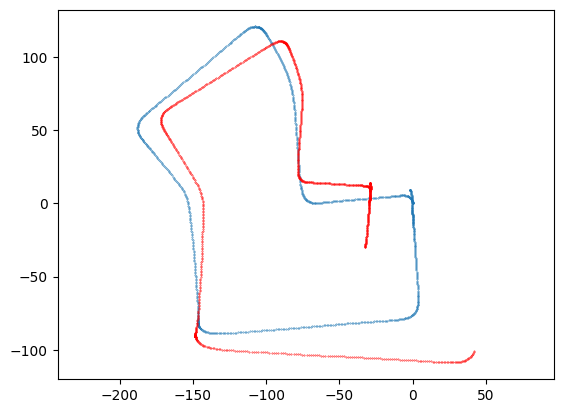

In [26]:
data= gen_data(ground_time, res_format, ground_data)
ground_points = np.asarray(get_coo(data))
re_points = np.asarray(get_points(res_format))
# print(type(ground_points))
rot,trans,trans_error,s = align(re_points, ground_points)
# print(rot)
re_fpoints = s*rot*re_points+trans
# print(re_fpoints[0])
# print(trans_error)
plt.axis('equal')
plt.scatter(ground_points[0], ground_points[2], s=0.1)
plt.scatter(list(re_fpoints[0]), list(re_fpoints[2]), s=0.1, c='red')
aa = list(re_fpoints[0])
x = aa[0].tolist()
aa = list(re_fpoints[2])
y = aa[0].tolist()

print ("compared_pose_pairs %d pairs"%(len(trans_error)))
print ("absolute_translational_error.rmse %f m"%np.sqrt(np.dot(trans_error,trans_error) / len(trans_error)))
print ("absolute_translational_error.mean %f m"%np.mean(trans_error))
print ("absolute_translational_error.median %f m"%np.median(trans_error))
print ("absolute_translational_error.std %f m"%np.std(trans_error))
print ("absolute_translational_error.min %f m"%np.min(trans_error))
print ("absolute_translational_error.max %f m"%np.max(trans_error))

# for num in range(len(ground_points[0])):
# plt.plot([ground_points[0][num], x[0][num]], [ground_points[2][num], y[0][num]], c = 'green')
plt.show()